# KSA206: Polar Observations and Modelling

# Week 7 - Shelf changes

The Antarctic continental shelf is a crucial location to monitor in the context of climate change. Not only is the melt of ice sheets is driven to a large extent by the ocean temperatures, but monitoring what happens with the ocean at the Antarctic margins is a sort of "thermometer" for change. 

We will now take a look at what these experiments show for the shelf. We will look at a couple of different properties at certain locations - including at changes to a very important current: the Antarctic Slope Current.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import glob
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Load data

Let's first load our experiment data and calculate the changes (which we will call anomalies) as we did in `2_Open_ocean_changes.ipynb`.

In [2]:
# Get paths
path_control = glob.glob('data/control*')
path_twpm = glob.glob('data/mw_ssp585*')
path_twp = glob.glob('data/ssp585*')

In [3]:
# Open data
control = xr.open_mfdataset(path_control)
twpm = xr.open_mfdataset(path_twpm)
twp = xr.open_mfdataset(path_twp)

In [4]:
# Calculate anomalies
twpm_anomalies = twpm - control
twp_anomalies = twp - control

## Cross sections

Let's look at cross-sections at different locations around the Antarctic margins, beginning with one in the Amundsen Bellinghausen Sea. Remember this is the region where we are observing the most melt and one of the most vulnerable locations in terms of ice sheet melt. Let's choose a single location - 80W - and plot the teemperatures from CONTROL, and anomalies from both perturbation experiments.

In [5]:
amundsen_control = control.sel(xt_ocean = -80, xu_ocean = -80, method = 'nearest').sel(yt_ocean = slice(-74, -67), yu_ocean = slice(-74, -67))
amundsen_twp = twp.sel(xt_ocean = -80, xu_ocean = -80, method = 'nearest').sel(yt_ocean = slice(-74, -67), yu_ocean = slice(-74, -67))
amundsen_twpm = twpm.sel(xt_ocean = -80, xu_ocean = -80, method = 'nearest').sel(yt_ocean = slice(-74, -67), yu_ocean = slice(-74, -67))

<h4 style="color: red;">Question 1</h4>

Why are we selecting with `xt_ocean` and `xu_ocean`?

*Answer here*

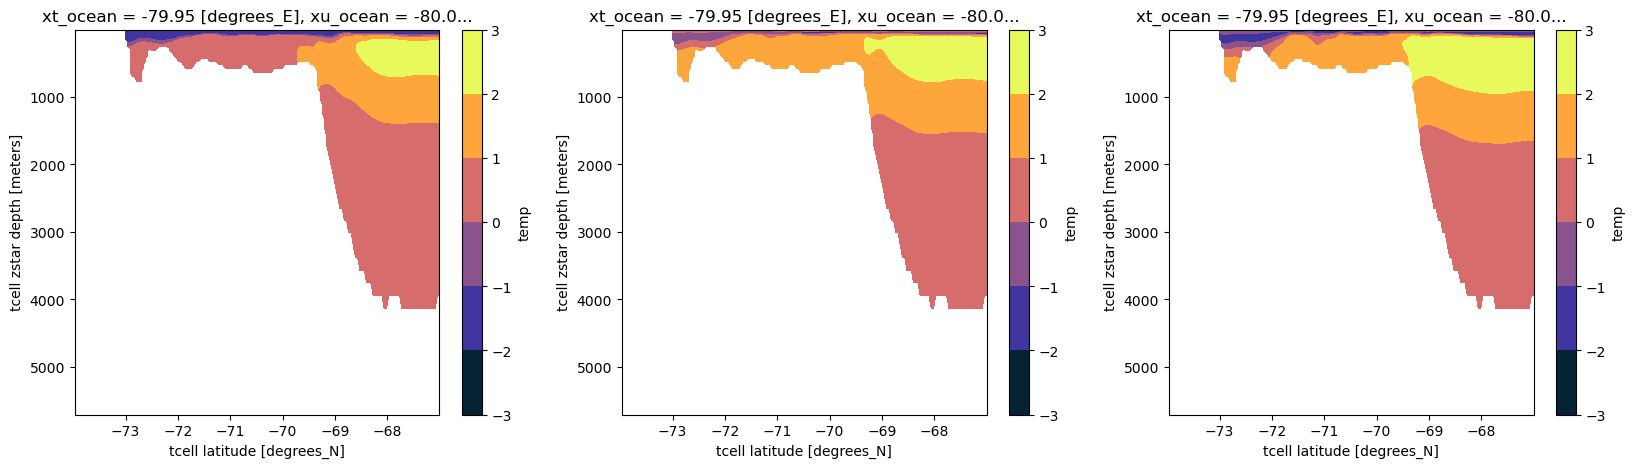

In [6]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

(amundsen_control['temp']-273.15).plot.contourf(ax = axs[0], cmap = cm.cm.thermal, yincrease = False)
(amundsen_twp['temp']-273.15).plot.contourf(ax = axs[1], cmap = cm.cm.thermal, yincrease = False)
(amundsen_twpm['temp']-273.15).plot.contourf(ax = axs[2], cmap = cm.cm.thermal, yincrease = False)

Let's improve the figure a little (and reduce the depth limit to be able to focus on the shelf):

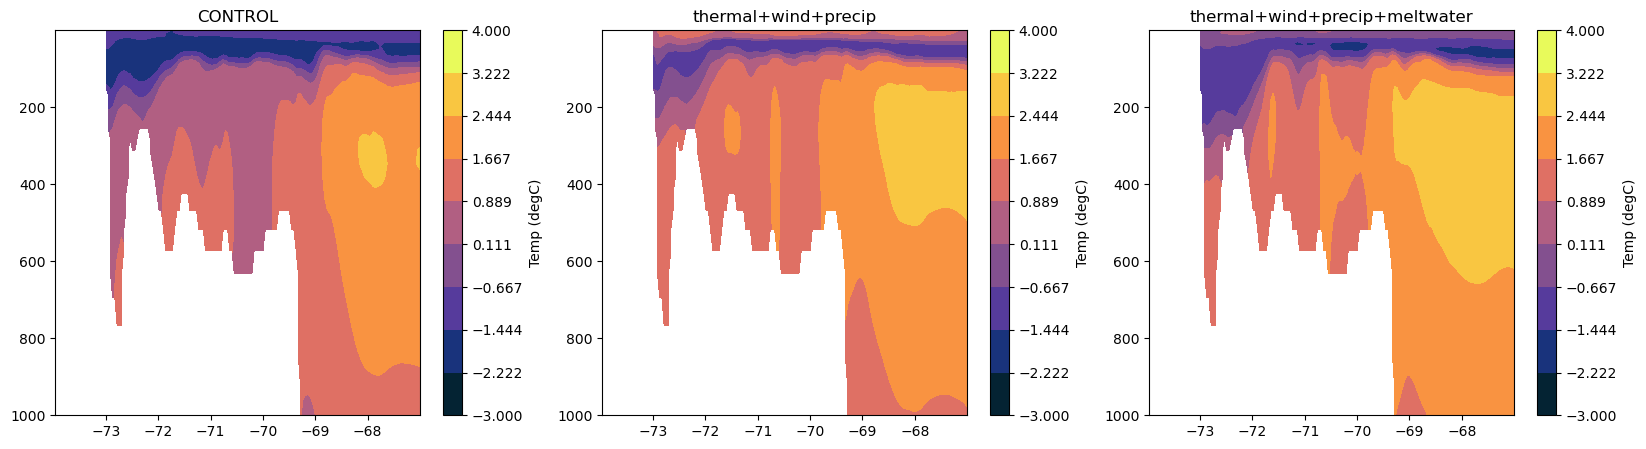

In [7]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

(amundsen_control['temp']-273.15).plot.contourf(ax = axs[0], cmap = cm.cm.thermal, yincrease = False, 
                                                vmin = -3, vmax = 4, levels = 10,
                                                cbar_kwargs = {'label':'Temp (degC)'})
axs[0].set_title('CONTROL')
(amundsen_twp['temp']-273.15).plot.contourf(ax = axs[1], cmap = cm.cm.thermal, yincrease = False, 
                                            vmin = -3, vmax = 4, levels = 10,
                                            cbar_kwargs = {'label':'Temp (degC)'})
axs[1].set_title('thermal+wind+precip')
(amundsen_twpm['temp']-273.15).plot.contourf(ax = axs[2], cmap = cm.cm.thermal, yincrease = False, 
                                             vmin = -3, vmax = 4, levels = 10,
                                             cbar_kwargs = {'label':'Temp (degC)'})
axs[2].set_title('thermal+wind+precip+meltwater')

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(1000, None)

And now let's plot salinity:

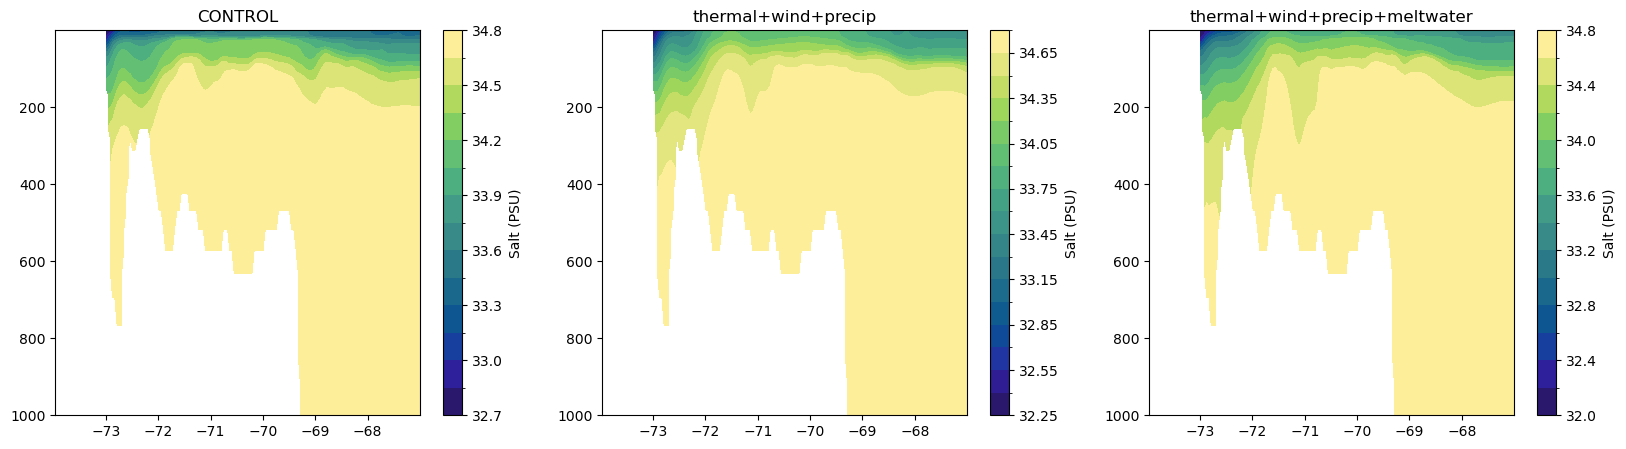

In [8]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))

(amundsen_control['salt']).plot.contourf(ax = axs[0], cmap = cm.cm.haline, yincrease = False, levels = 18,
                                         cbar_kwargs = {'label':'Salt (PSU)'})
axs[0].set_title('CONTROL')
(amundsen_twp['salt']).plot.contourf(ax = axs[1], cmap = cm.cm.haline, yincrease = False, levels = 18,
                                     cbar_kwargs = {'label':'Salt (PSU)'})
axs[1].set_title('thermal+wind+precip')
(amundsen_twpm['salt']).plot.contourf(ax = axs[2], cmap = cm.cm.haline, yincrease = False, levels = 18,
                                     cbar_kwargs = {'label':'Salt (PSU)'})
axs[2].set_title('thermal+wind+precip+meltwater')

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(1000, None)

You can see that this region of the shelf has mostly warmed, with the offshore warm core (Circumpolar Deep Water) migrating south and intruding onto the continental shelf. Moreover, the salinities at the coast have decreased, related to an overall freshening. The freshening is more intense in the experiment with meltwater, where extra freshwater is being added at the coast.

<h4 style="color: red;">Question 2</h4>

Choose other locations around the continental shelf and repeat the cross sections. Discuss you results!

*Answer here*

## Antarctic Slope Current

The Antarctic Slope Current (ASC) is a quasi-circumpolar current that flows around Antarctica in an anti-clockwise direction. We say it is quasi-circumpolar because it is either absent or very weak in West Antarctica. It is a really important dynamical feature of the ocean circulation, because typically when there is a strong, established current, the exchange of water masses from either side becomes inhibited - in other words, the ASC acts as a barrier for open-ocean water masses to come onto the shelf. Remember that open-ocean water masses are usually warmer than the waters on shelf, and so this mediating role controls to a certain extant how much heat gets to the ice shelves. The lack (or weakness) of the ASC in West Antarctica is one of the reasons behind the vulnerability of this area and the increased melt rates observed here. 

The ASC's properties vary around the Antarctic margins, and it is usually classified into three distinct regimes: a surface intensified, a bottom intensified, and a reverse ASC. These are illustrated in the figure below from [Huneke et al. (2022)](https://journals.ametsoc.org/view/journals/phoc/52/3/JPO-D-21-0143.1.xml):

<p align="center">
<img src="images/asc_regimes.png" width="70%"/>
</p>

Each of these regimes is associated with a particular temperature/salinity structure of the Antarctic Slope Front - fresh ASF, dense ASF and warm ASF. You can see the spatial distribution of these three regimes in the following figure from [Thompson et al. (2018)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018RG000624):

<p align="center">
<img src="images/asf_regimes.png" width="40%"/>
</p>

We will pick three different locations to look at what happened with the ASC in these shelf regimes in the perturbation experiments, by looking at the zonal velocities. *Technically we should be looking at along-slopes velocities*, but because the slope is mostly zonally oriented almost everywhere, zonal velocities suffice.

In [9]:
# Fresh shelf
control_fresh = control['u'].sel(xu_ocean = 90, method = 'nearest').sel(yu_ocean = slice(-68, -65))
twp_fresh = twp['u'].sel(xu_ocean = 90, method = 'nearest').sel(yu_ocean = slice(-68, -65))
twpm_fresh = twpm['u'].sel(xu_ocean = 90, method = 'nearest').sel(yu_ocean = slice(-68, -65))

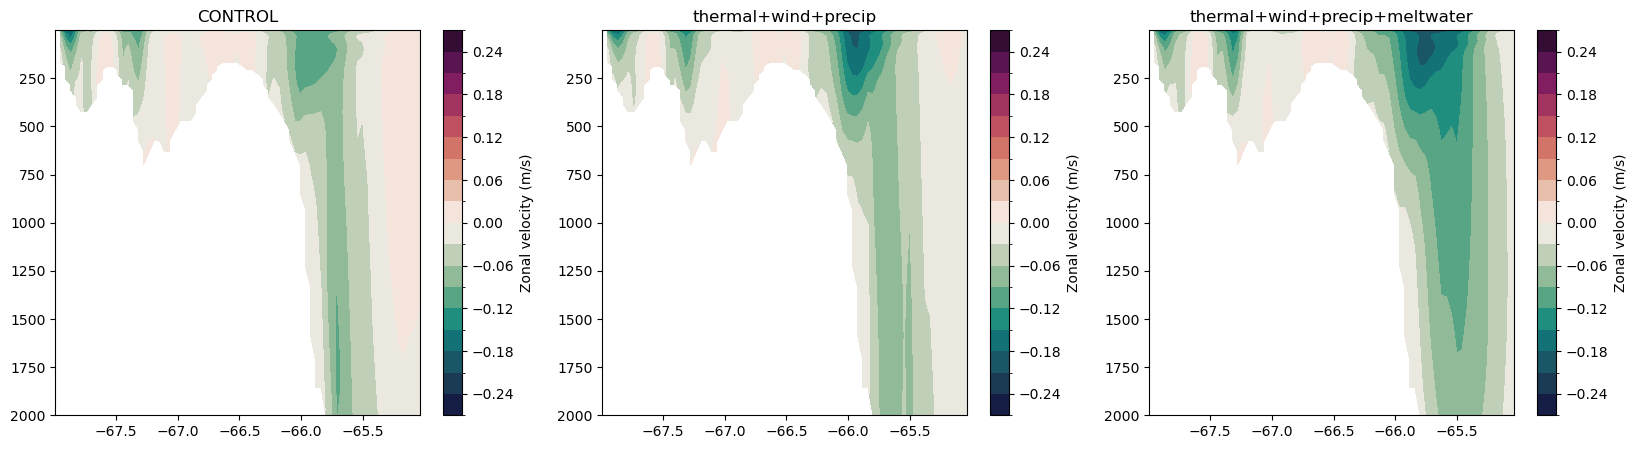

In [10]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
control_fresh.plot.contourf(ax = axs[0], cmap = cm.cm.curl, yincrease = False, levels = 18,
                            cbar_kwargs = {'label':'Zonal velocity (m/s)'})
axs[0].set_title('CONTROL')
twp_fresh.plot.contourf(ax = axs[1], cmap = cm.cm.curl, yincrease = False, levels = 18,
                        cbar_kwargs = {'label':'Zonal velocity (m/s)'})
axs[1].set_title('thermal+wind+precip')
twpm_fresh.plot.contourf(ax = axs[2], cmap = cm.cm.curl, yincrease = False, levels = 18,
                        cbar_kwargs = {'label':'Zonal velocity (m/s)'})
axs[2].set_title('thermal+wind+precip+meltwater')

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(2000, None)

<h4 style="color: red;">Question 3</h4>

Has the ASC in this location strengthened or weakened? Justify your answer using the plots.

*Answer here*

<h4 style="color: red;">Question 4</h4>

Look at what happens in locations with bottom-intensified or reversed ASC by choosing other appropriate locations and plotting the cross-sections of zonal velocity.

*Answer here*